<a href="https://colab.research.google.com/github/ahmedshams99/Smart-Devices-Detection/blob/master/YOLO_working_with_darknet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

In [0]:
!git clone https://github.com/ahmedshams99/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 13042, done.
remote: Total 13042 (delta 0), reused 0 (delta 0), pack-reused 13042
Receiving objects: 100% (13042/13042), 11.76 MiB | 11.74 MiB/s, done.
Resolving deltas: 100% (8914/8914), done.


In [0]:
cd /content/darknet

/content/darknet


In [0]:
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:247:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
gcc -Iinclude/ -I3rdparty/stb/include -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -W

In [0]:
!wget https://pjreddie.com/media/files/darknet19_448.conv.23

--2020-04-18 21:21:42--  https://pjreddie.com/media/files/darknet19_448.conv.23
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79327120 (76M) [application/octet-stream]
Saving to: ‘darknet19_448.conv.23’

darknet19_448.conv. 100%[===================>]  75.65M   349KB/s    in 3m 45s  

2020-04-18 21:25:29 (344 KB/s) - ‘darknet19_448.conv.23’ saved [79327120/79327120]



In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-04-19 12:05:03--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   660KB/s    in 6m 35s  

2020-04-19 12:11:40 (614 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

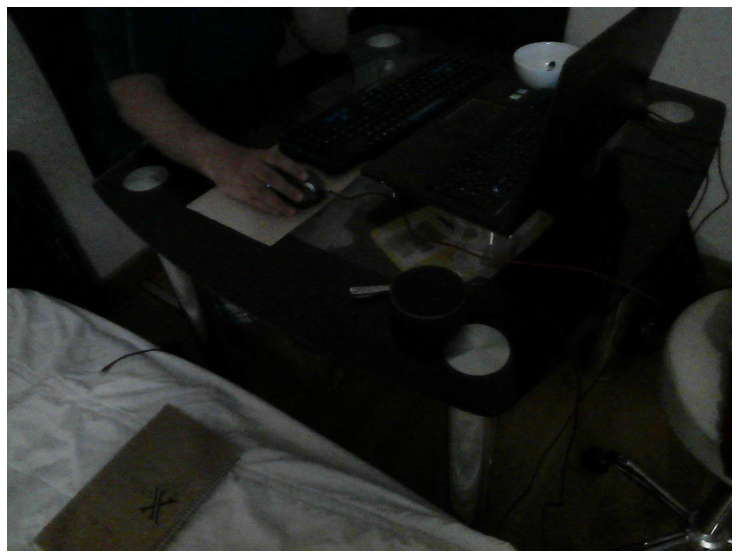

In [0]:
imShow("full_photo.jpg")

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV isn't used - data increase will run slowly 
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, w

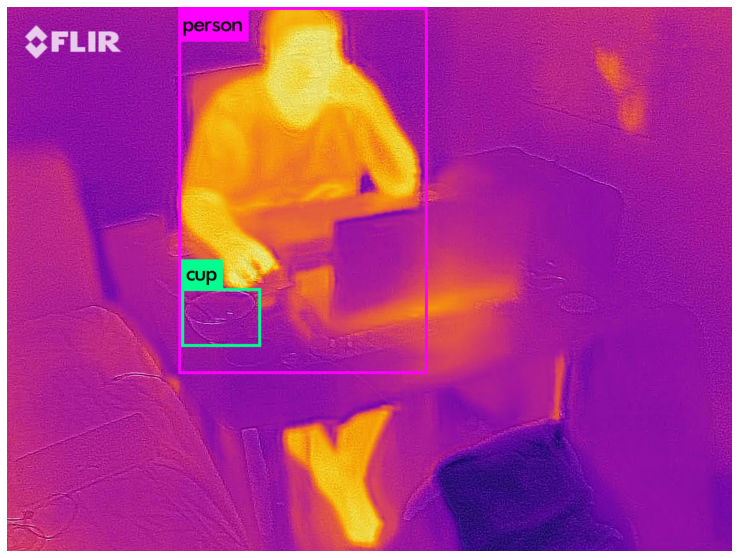

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights test2.jpg -dont-show
imShow('predictions.jpg')

In [0]:
!git clone https://github.com/mohanrajmit/Safety_Detection.git

Cloning into 'Safety_Detection'...
remote: Enumerating objects: 1387, done.
remote: Total 1387 (delta 0), reused 0 (delta 0), pack-reused 1387
Receiving objects: 100% (1387/1387), 28.13 MiB | 23.47 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [0]:
# # Attempt to create an image with 6 channels to feed to model but can't save it (Failed Attempt)
# from PIL import Image
# import numpy as np
# path = '/content/darknet/Safety_Detection/dataset'
# for img in os.listdir(path):
#   if ".jpg" in img:
#     img = np.array(Image.open(path+"/"+img))
#     img = np.concatenate((img, img), axis=2)
#    Image.fromarray(img).save(path+"/"+img)

TypeError: ignored

In [0]:
mv /content/darknet/Safety_Detection/image /content/darknet

In [0]:
mv /content/darknet/Safety_Detection/dataset /content/darknet

In [0]:
!./darknet detector train cfg/obj.data cfg/yolo-voc.2.0.cfg darknet19_448.conv.23 -dont_show 0

Region Avg IOU: 0.530033, Class: 0.976223, Obj: 0.001807, No Obj: 0.001982, Avg Recall: 0.500000,  count: 12
Region Avg IOU: 0.508623, Class: 0.864002, Obj: 0.002324, No Obj: 0.001848, Avg Recall: 0.615385,  count: 13
Region Avg IOU: 0.527290, Class: 0.996634, Obj: 0.000986, No Obj: 0.001654, Avg Recall: 0.500000,  count: 12
Region Avg IOU: 0.566015, Class: 0.994733, Obj: 0.000593, No Obj: 0.001769, Avg Recall: 0.750000,  count: 12
Region Avg IOU: 0.425249, Class: 0.821810, Obj: 0.004421, No Obj: 0.001896, Avg Recall: 0.428571,  count: 14
Region Avg IOU: 0.596635, Class: 0.963504, Obj: 0.001019, No Obj: 0.001872, Avg Recall: 0.692308,  count: 13

 76: 0.506994, 0.507500 avg loss, 0.000100 rate, 5.404509 seconds, 4864 images, 70.862604 hours left
Loaded: 0.000059 seconds
Region Avg IOU: 0.548208, Class: 0.880304, Obj: 0.001395, No Obj: 0.001740, Avg Recall: 0.636364,  count: 11
Region Avg IOU: 0.582791, Class: 0.998140, Obj: 0.000740, No Obj: 0.001636, Avg Recall: 0.727273,  count: 11
R

In [0]:
./darknet detector train cfg/coco.data cfg/yolov3.cfg backup/yolov3.backup